This Jupyter Notebook documents the cleaning procedure of a Bibliographic Database (Excel File) generated through the [Bibliometrix R-package](https://www.bibliometrix.org) (developed by Massimo Aria and Corrado Cuccurullo) in the **"R-Notebook Bibliometrix"**. Then it displays interactive outputs and visualisations.  
The complete **Github repository** is available in GitHub at [Research Quilting](https://github.com/sim4action/Research-Quilting).   

The Overall Workflow for developing a new search relies on two notebooks: "Python-Notebook Bibliometrix" and "R-Notebook Bibliometrix". It goes as follows:
**1.** 
2. 
3. 

-----

# **Set-up**

## **DEPENDENCIES**

In [2]:
%config InlineBackend.figure_format ='retina'
import pandas as pd
import os
from glob import glob
import shutil                        # to move files
from IPython.display import Image    # to display images in code cells

In [3]:
# To graph with Plotly offline:
import plotly.graph_objs as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import matplotlib.cm

In [ ]:
# To graph with Plotly online:
api = input("Insert API key from Plotly: ")
user = input("Insert user name from Plotly: ")
# 2NexotbGiaTPZ5x7CNWa; mlcanales
import chart_studio
import plotly.io as pio
import chart_studio.plotly as py 
chart_studio.tools.set_credentials_file(username=user, api_key=api)

In [6]:
# To get all results printed: (or "last_expr" to only last expression from cell)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)  # To show all columns on results
pd.set_option('display.max_rows', None)     # To show all rows on results
pd.set_option('display.max_colwidth', -1) # To display all length of each cell

<ipython-input-6-4615a404387f>:7: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



## **WORKING DIRECTORY**

**We set the working directory in "Research Quilting" folder:**

In [4]:
%cd ..
main_path = os.getcwd() + "/"
print("main_path is: ",main_path)

/Users/mlcanales/Documents/(Git) Projects/Research Quilting
main_path is:  /Users/mlcanales/Documents/(Git) Projects/Research Quilting/


**We also edit the "Working directory for R.txt" file to set the working directory of the "R-Notebook Bibliometrix":**

In [15]:
file = open("Working directory for R.txt","w+")
file.write(main_path)
file.write('\n')
file.close()
shutil.move(os.path.join(main_path,"Working directory for R.txt"),os.path.join(main_path,"Jupyter notebooks","Working directory for R.txt"))

'/Users/mlcanales/Documents/(Git) Projects/Research Quilting/Jupyter notebooks/Working directory for R.txt'

# **WORKFLOW**

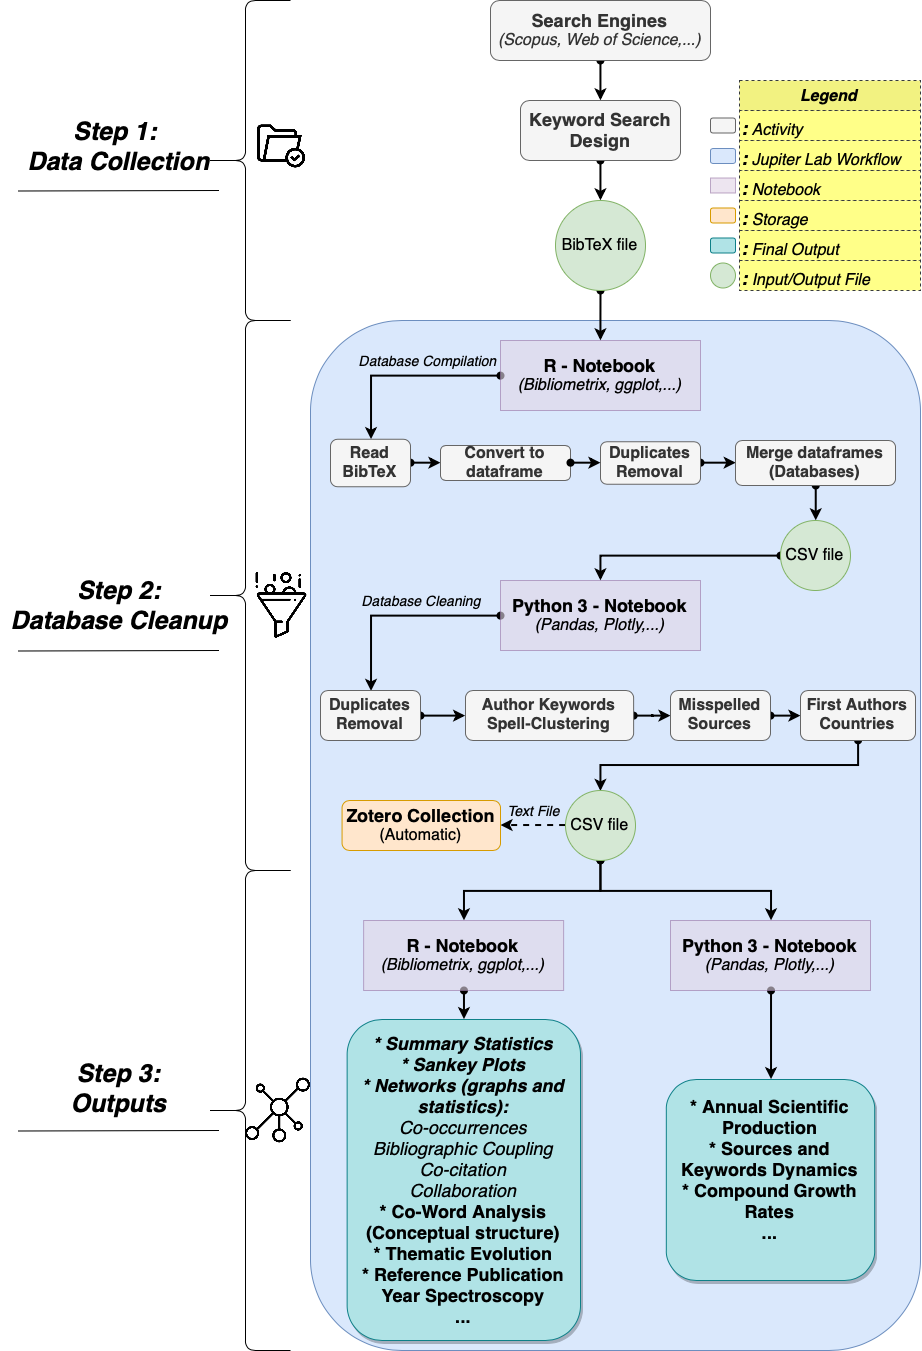

In [6]:
from IPython.display import Image
Image(filename= "Workflow.png", width=600, height=600)

# WORKING FOLDERS 

**For each keyword search we make a unique folder that centralizes all of its files. The following code generates the needed folders for the keyword search. This cell must only be executed to create the folders (i.e. it is a new clean search). If the folders already exist, only relative paths are needed in the rest of the notebook, for which the following cell is not necessary (skip to next one).**  
- **Cleaning Files**: Contains the excel files working as dictionaries in the cleaning procedure ahead.
- **Database**: Contains the final cleaned Database (after cleaning procedure).
- **Input Data**: Contains the input BibTeX files downloaded from search engines.
- **Outputs**: Contains Figures (screenshots) and Network (.net) files.

In [7]:
# Folder for the specific Keyword search
db = input("Choose name of Keyword Search/Database: ")
os.mkdir(db)
kw_from = main_path + db
kw_to = main_path + "Keyword Searches/" + db + "/"
shutil.move(kw_from,kw_to)

# Folder for Input Data
input_folder = "Input Data"
os.mkdir(input_folder)
data_from = main_path + input_folder
data_to = kw_to + input_folder + "/"
shutil.move(data_from,data_to)

# Folder for Cleaning files
cleaning_folder = "Cleaning Files"
os.mkdir(cleaning_folder)
kw_cleaning_from = main_path + cleaning_folder
kw_cleaning_to = kw_to + cleaning_folder + "/"
shutil.move(kw_cleaning_from,kw_cleaning_to)

# Folder for Database cleaned
database_folder = "Database"
os.mkdir(database_folder)
database_from = main_path + database_folder
database_to = kw_to + database_folder + "/"
shutil.move(database_from,database_to)

# Main Folder Outputs
output_folder = "Outputs"
os.mkdir(output_folder)
output_from = main_path + output_folder
output_to = kw_to + output_folder + "/"
shutil.move(output_from,output_to)

# Subfolders Outputs
sub_outputs_list = ["Figures", "Networks"]
for element in sub_outputs_list:
    os.mkdir(element)
    source_path = main_path + element
    destination_path1 = output_to + element + "/"
    shutil.move(source_path,destination_path1)
    if element == "Networks":
        net_list = ["Co-citations","Collaborations","Bibliographic Coupling","Co-occurrences"]
        for element in net_list:
            os.mkdir(element)
            source_path = main_path + element
            destination_path2 = destination_path1 + element
            shutil.move(source_path,destination_path2)

Choose name of Keyword Search/Database:  ABM & Combat


'/Users/macadmin/Desktop/(Git) Projects/Research Quilting/Keyword Searches/ABM & Combat/'

'/Users/macadmin/Desktop/(Git) Projects/Research Quilting/Keyword Searches/ABM & Combat/Input Data/'

'/Users/macadmin/Desktop/(Git) Projects/Research Quilting/Keyword Searches/ABM & Combat/Cleaning Files/'

'/Users/macadmin/Desktop/(Git) Projects/Research Quilting/Keyword Searches/ABM & Combat/Database/'

'/Users/macadmin/Desktop/(Git) Projects/Research Quilting/Keyword Searches/ABM & Combat/Outputs/'

'/Users/macadmin/Desktop/(Git) Projects/Research Quilting/Keyword Searches/ABM & Combat/Outputs/Figures/'

'/Users/macadmin/Desktop/(Git) Projects/Research Quilting/Keyword Searches/ABM & Combat/Outputs/Networks/'

'/Users/macadmin/Desktop/(Git) Projects/Research Quilting/Keyword Searches/ABM & Combat/Outputs/Networks/Co-citations'

'/Users/macadmin/Desktop/(Git) Projects/Research Quilting/Keyword Searches/ABM & Combat/Outputs/Networks/Collaborations'

'/Users/macadmin/Desktop/(Git) Projects/Research Quilting/Keyword Searches/ABM & Combat/Outputs/Networks/Bibliographic Coupling'

'/Users/macadmin/Desktop/(Git) Projects/Research Quilting/Keyword Searches/ABM & Combat/Outputs/Networks/Co-occurrences'

# RELATIVE PATHS

Here, we first set the appropiate and needed (notebook references to these paths) relative paths.

In [4]:
db = input("Choose name of Keyword Search (i.e. Database): ")
kw_from = main_path + db
kw_to = main_path + "Keyword Searches/" + db + "/"
kw_cleaning_from = main_path + "Cleaning Files"
kw_cleaning_to = kw_to + "Cleaning Files/"
database_from = main_path + "Database"
database_to = kw_to + "Database/"
output_from = main_path + "Outputs"
output_to = kw_to + "Outputs/"

Choose name of Keyword Search (i.e. Database):  ABM & Combat


# **Importing Bibliometrix CSV for Cleaning**

**We now read the Database as a Pandas Dataframe (variable: "df"), and print its dimensions and the number of missing elements on each field. Is important to notice that in this code we rely on the "Titles" field of the Database to be complete**

In [7]:
df = pd.read_csv('db_r_to_py.csv')
print('Dimensions of the Database are: ', df.shape)
print('"Titles" tag field of Database has: ', df['TI'].isna().sum(), 'missing elements (must be 0 for cleaning procedure)')
print(df.isna().sum())

Dimensions of the Database are:  (165, 37)
"Titles" tag field of Database has:  0 missing elements (must be 0 for cleaning procedure)
Unnamed: 0    0  
AU            0  
DE            34 
ID            68 
C1            7  
CR            11 
AB            0  
PA            62 
AR            137
DI            61 
BE            119
FU            139
FX            139
BN            84 
SN            47 
JI            0  
SO            0  
LA            0  
PN            89 
PP            25 
PU            48 
TC            0  
TI            0  
DT            0  
VL            52 
PY            0  
RP            20 
DB            0  
AU_UN         16 
AU1_UN        0  
AU_UN_NR      165
SR_FULL       0  
SR            0  
CR_AU         11 
CR_SO         11 
AU_CO         9  
AU1_CO        41 
dtype: int64


## **Duplicates Removal**

**Here we aim to drop any duplicates remaining in the Database by using the DOI identifier of papers (column "DI"). We print at the beginning and the end the Database dimensions, and also the papers that have been removed**

In [6]:
print("Database Initial Dimensions are: ", df.shape)

# We first generate a Pandas Series from the "DI" (DOI identifier) column of the Database
s = df.loc[:,['DI']]

# We drop missing values from this series (i.e. missing DOIs), so they don't get dropped in the duplicated detection
s = s.dropna()

# Now we keep only the duplicated rows (papers)
s = s.duplicated()
s = s[s == True] 

# We get a list of index values from this series, and print the values to erase
s_index = s.index.tolist()
print("Indexes removed from the dataframe are: ", s_index)
list2 = []
for element in s_index:
    list2.append(df.loc[element,['TI']])
serie = pd.Series(list2)
serie

# Finally, we use the index from this series to remove duplicated papers in the original database, and then we reset the index.
df = df.drop(s_index)
df = df.reset_index(drop=True)

print("Database Final Dimensions are (whitout duplicates): ", df.shape)

Database Initial Dimensions are:  (165, 37)
Indexes removed from the dataframe are:  [75, 125]
Database Final Dimensions are (whitout duplicates):  (163, 37)


## **Field Tags Cleaning**

**Instructions**

<div style="text-align: justify"> Each following subsection follows the same two-step approach to: (1) clean misspelled elements and (2) cluster different spellings of the same concepts (e.g. "agent based" and "agent-based"). In all cases, the process is done in two consecutive steps: First, we compile Excel files (e.g. "Spelling_Check_DE") for the user to manually detect terms to change or to cluster. Second, we write the desired changes in another Excel file (e.g. "Checklist_DE") that follows an old-value and new-value format, and works as a dictionay that automatically feeds and edits the original Database. </div>

### **Author Keywords (DE)**

<div style="text-align: justify"> The first part of the code compiles an Excel file ("Spelling_Check_DE") with all detected author keywords in the Database for the manual analysis. Desired changes must be written in the Excel file ("Checklist_DE"). The second part of the code feeds from this Dictionary (Excel file) to automatically edit the original Database </div>

In [12]:
# STEP 1: First we clean the Author Keywords column of the Database from characters such as: /&; &; "" (quotes); etc...
df['DE'] = df['DE'].str.replace('\&', 'AND', regex=False)
df['DE'] = df['DE'].str.replace('&', 'AND', regex=False)
df["DE"] = df['DE'].str.replace('"','', regex=False)


# STEP 2: Second, we count the ammount of Author Keywords detected in the Database
# For this, we first generate a list (var: df_list_cleaned) containing all keywords on the Database (excluding "NaN" or missing values)
df_list = df['DE'].tolist()
df_list_cleaned = [str(x) for x in df_list if str(x) != 'nan']

# Since each papers has several keywords on it, now we split this list to have one keyword on each row (var: full_list)
full_list = []
for element in df_list_cleaned:
    full_list.extend(element.split(';'))

# We now transform this list to a Pandas Series (var: s1), remove spacings in words and print the ammount of keywords detected
s1 = pd.Series(full_list)
s1 = s1.str.strip()
print("Ammount of total (with duplicates) Author Keywords detected are: ", s1.shape)


# STEP 3: Third, we generate a dataframe with the cleaned author keywords and the individual counting of each (var: dataframe_test)
# For this, we first transform this series (var: s1) into a Pandas Dataframe (var: dataframe)
dataframe = pd.DataFrame(columns = ['DE'])
dataframe['DE'] = s1

# Now we sort all keywords by name
dataframe = dataframe.sort_values(by=['DE'])
dataframe = dataframe.reset_index(drop=True)

# Finally we generate a new Pandas dataframe (var: dataframe_test) with both the author keywords and the co-occurrences counting
dataframe_test = pd.DataFrame({'Count' : dataframe.groupby( ["DE"] ).size()}).reset_index()
print("Ammount of non-duplicated Author Keywords detected are: ", dataframe_test.shape)


# STEP 4: The final step consists of a manual (human) check of similar keywords by using the generated Excel file ("Spelling_Check_DE"),
# and compile the Dictionary through the Excel file "Checklist_DE"
e_path = kw_cleaning_to + 'Spelling_Check_DE.xlsx'
dataframe_test.to_excel(e_path, header=True, index = False)

Ammount of total (with duplicates) Author Keywords detected are:  (388,)
Ammount of non-duplicated Author Keywords detected are:  (284, 2)


> Now open the "Spelling_Check_DE.xlsx" file and write over the "CheckList_DE.xlsx" file the new desired keywords

In [9]:
# After the "CheckList_DE.xlsx" has been created, it is used to edit the Database. 
# For this, we first read the file (var: check_list):
e_path = main_path + "Comparison Files/CheckList_DE.xlsx"
check_list = pd.read_excel(e_path)

# Then we get rid of missing values replacing them by an empty string ""
df['DE'] = df['DE'].fillna("")

# Finally we use this dictionary to edit the original Database 
# For this, the keywords of each paper in the Database are stored in a list (var: list2), then properly transformed according to the 
# Dictionary, and finally pasted back to the Database.
list1 = []
list2 = []
for index, row in df.iterrows():
    list1.extend(row['DE'].split(';'))
    for element in list1:
        list2.append(element.strip())
    # Here list2 is a list with the first row of the dataframe cleaned from spaces and ready for comparison:
    i = 0
    for element in list2:
        for index, column in check_list.iterrows():
            if element == column[0]:
                list2[i] = column[1]
                break
        i = i + 1
    # Here list2 has been transformed according to the dictionary
    # Now we finally paste this list back to the Database
    df.replace(row['DE'], "; ".join(list2), inplace = True)
    # Here we clean all lists for the next iteration (row) in the Database
    list1 = []
    list2 = []

### **Sources (SO)**

<div style="text-align: justify"> The first part of the code compiles an Excel file ("Spelling_Check_SO") with all detected sources in the Database for the manual analysis. Desired changes must be written in the Excel file ("Checklist_SO"). The second part of the code feeds from this Dictionary (Excel file) to automatically edit the original Database </div>

In [13]:
# STEP 1: First we clean the Sources column of the Database from characters such as: /&; &; "" (quotes); etc...
df['SO'] = df['SO'].str.replace('\&', 'AND', regex=False)
df['SO'] = df['SO'].str.replace('&', 'AND', regex=False)
df['SO'] = df['SO'].str.replace('"','', regex=False)


# STEP 2: Second, we exdetected in the Database
# For this, we first generate a list (var: df_list_cleaned) containing all sources on the Database (excluding "NaN" or missing values)
df_list = df['SO'].tolist()
df_list_cleaned = [str(x) for x in df_list if str(x) != 'nan']

# We now transform this list to a Pandas Series (var: s1), remove spacings in words and print the ammount of sources detected
s1 = pd.Series(df_list_cleaned)
s1 = s1.str.strip()
print("Ammount of Total sources (with duplicates) detected is: ", s1.shape)


# STEP 3: Third, we generate a dataframe with sources and the individual counting of each (var: dataframe_test)
# For this, we first transform this series (var: s1) into a Pandas Dataframe (var: dataframe)
dataframe = pd.DataFrame(columns = ['SO'])
dataframe['SO'] = s1

# Now we sort all sources by name
dataframe = dataframe.sort_values(by=['SO'])
dataframe = dataframe.reset_index(drop=True)

# Finally we generate a new Pandas dataframe (var: dataframe_test) with both sources and the co-occurrences counting
dataframe_test = pd.DataFrame({'Count' : dataframe.groupby( ["SO"] ).size()}).reset_index()
print("Ammount of non-duplicated Sources detected is: ", dataframe_test.shape)


# STEP 4: The final step consists of a manual (human) check of similar sources by using the generated Excel file ("Spelling_Check_SO"),
# and compile the Dictionary through the Excel file "Checklist_SO"
e_path = kw_cleaning_to + 'Spelling_Check_SO.xlsx'
dataframe_test.to_excel(e_path, header=True, index = False)

Ammount of Total sources (with duplicates) detected is:  (109,)
Ammount of non-duplicated Sources detected is:  (91, 2)


> Check the "Spelling_Check_SO.xlsx" file for sources to re-write (mispelled or different spellings) and write "CheckList_SO.xlsx" in the format explicited.

In [14]:
# After the "CheckList_SO.xlsx" has been created, it is used to edit the Database. 
# For this, we first read the file (var: check_list):
e_path = main_path + "Comparison Files/CheckList_SO.xlsx"
check_list = pd.read_excel(e_path) 

# Then we get rid of missing values replacing them by an empty string ""
df['SO'] = df['SO'].fillna("")
# Finally we use this dictionary to edit the original Database 
# For this, the keywords of each paper in the Database are stored in a list (var: list2), then properly transformed according to the 
# Dictionary, and finally pasted back to the Database.
list1 = []
list2 = []
for index, row in df.iterrows():
    list1.extend(row['SO'].split(';'))
    for element in list1:
        list2.append(element.strip())
    # Here list2 is a list with the first row of the dataframe cleaned from spaces and ready for comparison:
    i = 0
    for element in list2:
        for index, column in check_list.iterrows():
            if element == column[0]:
                list2[i] = column[1]
                break
        i = i + 1
    # Here list2 has been transformed according to the dictionary
    # Now we finally paste this list back to the Database
    df.replace(row['SO'], ", ".join(list2), inplace = True)
    # Here we clean all lists for the next iteration (row) in the Database
    list1 = []
    list2 = []

### **First Author Countries (AU1_CO)**

<div style="text-align: justify"> The first part of the code compiles two Excel files that aim to check mispelled countries ("Spelling_Check_AU1_CO") and missing first author counties ("NaN_Check_AU1_CO"). Desired changes for the latter must be written in the Excel file ("Checklist_AU1_CO"). The second part of the code feeds from this Dictionary (Excel file) to automatically edit the original Database </div>

In [12]:
# Getting a list of Country of Affiliation of each first author (AU1_CO) and co-author
# Here, the idea is to check if all countries under AU1_CO are written correctily (i.e. USA vs United States) to group them correctly.
df_sliced = df[['DI', 'TI', 'AU', 'AU1_CO', 'AU_CO']]

# First for spelling issues we check the different countries listed in column AU1_CO
df_not_null = df_sliced.dropna(subset = ['AU1_CO'])
df_not_null = df_not_null.sort_values(by =['AU1_CO'])
df_not_null = df_not_null.drop_duplicates(subset = "AU1_CO")

e_path = kw_cleaning_to + 'Spelling_Check_AU1_CO.xlsx'
df_not_null.to_excel(e_path)

In [13]:
# Now, to add the missing countries, we will have to detect them, saved them to excel and add them manually by looking at WOS or Scopus
df_null_1 = df_sliced[df["AU1_CO"].isnull()]
df_null_1 = df_null_1.reindex(columns=['DI', 'TI', 'AU', 'AU1_CO', 'AU_CO', 'AU1_CO_NEW'], fill_value = "")

e_path = kw_cleaning_to + 'NaN_Check_AU1_CO.xlsx'
df_null_1.to_excel(e_path)

> Check the "Spelling_Check_AU1_CO.xlsx" file for mispelled elements and the "NaN_Check_AU1_CO.xlsx" for NaN values. Replaces for both are added to "CheckList_AU1_CO.xlsx" in the "AU1_CO_NEW" column.

In [15]:
# After the "CheckList_AU1_CO.xlsx" has been created, it is used to edit the Database. 
# For this, we first read the file (var: check_list):
e_path = main_path + "Comparison Files/CheckList_SO.xlsx"
check_list = pd.read_excel(e_path) 

# First we get rid of NaN values replacing them by an empty string "" in the Database
df['AU1_CO'] = df['AU1_CO'].fillna("")

# Finally, we edit the Database by comparing the DOI column and pasting new values
for index1, row in df.iterrows():
    for index2, column in check_list.iterrows():
        if column[0] == index1:
            df.loc[index1,'AU1_CO'] = column[6]
            break

## **Database Saving**

<div style="text-align: justify"> The Database is saved to an Excel in "Database" folder and also on the main path to use directly on the Bibliometrix Notebook </div>

In [11]:
database_path = database_to + db + ".csv"
X = df.copy()
print('Database dimensions are: ', X.shape)
X.to_csv(database_path, index = False)

path_bibliometrix = main_path + "db_py_to_r.csv"
X.to_csv(path_bibliometrix, index=False)
#check = pd.read_csv(e_path)
#check.shape

Database dimensions are:  (163, 37)


## **Database Export to Zotero**

<div style="text-align: justify"> Here we transform the column "DI" (DOI Identifier of documents) to a text file ("list_zotero.txt" located in "Zotero" file), to upload the Database to zotero. For this, manually copy the files in the text file created, and paste them to the option "add item by identifier" in zotero.  
Since all missing DOIs (not included in the text file) are not added to Zotero, we save them to (var:). </div>

In [ ]:
print('Ammount of documents in Database are:', df['DI'].size)
print('Ammount of missing DOI in Database are:',df['DI'].isna().sum())
print('Therefore, ammount of papers ready to be uploaded to Zotero are: ', df['DI'].size - df['DI'].isna().sum())

In [ ]:
list_zotero = df['DI'].tolist()
list_zotero = [x for x in list_zotero if str(x) != 'nan']
zotero_path = output_to + "Zotero_DOI_list.txt"
with open(zotero_path, 'w') as file:
    for listitem in list_zotero:
        file.write('%s\n' % listitem)

# **Outputs**

**Reading the database ".CSV" file**

In [17]:
#df = pd.read_csv(database_path)
df = pd.read_csv("Keyword Searches/Jupyter/Database/Jupyter.csv")
df.shape

(396, 36)

## **Moving Networks files**

**Here we copy all bibliographic network files created through the R-Notebook Bibliometrix to the respective keyword search output folder**

In [19]:
net_path = main_path + "Temporal Outputs" + "/"
net_list = ["Co-citations","Collaborations","Bibliographic Coupling","Co-occurrences"]
for element in net_list:
    source_path_1 = net_path + element + "/" + "vosnetwork.net"
    destination_path_1 = output_to + "Networks" + "/" + element + "/" + "vosnetwork.net"
    shutil.copy(source_path_1,destination_path_1)
    source_path_2 = net_path + element + "/" + "VOSviewer.jar"
    destination_path_2 = output_to + "Networks" + "/" + element + "/" + "VOSviewer.jar"
    shutil.copy(source_path_2,destination_path_2)

## **Annual Scientific Production**

**First we get the annual scientific production and erase year 2020 to avoid bias in graph**

In [7]:
#Annual Scientific Production
ASP = pd.DataFrame({'Count' : df.groupby( ["PY"] ).size()})
ASP = ASP.fillna(0)

# We drop year 2020 to avoid bias in the graph
ASP.drop(ASP.tail(1).index, inplace=True)

**Now we select Color Scale**

In [8]:
# Color Selection
cmap = plt.cm.get_cmap('tab20c')
in_list = [0.1,0.3,0.5,0.7,0.8,0.9]
colour_list=[]
for element in in_list:
    rgba = cmap(element)
    rgba = tuple(int((255*x)) for x in rgba[0:3])
    rgb = 'rgb'+str(rgba)
    colour_list.append(rgb)
colour_list

cmap2 = plt.cm.get_cmap('viridis')
colour_list2=[]
for element in in_list:
    rgba = cmap2(element)
    rgba = tuple(int((255*x)) for x in rgba[0:3])
    rgb = 'rgb'+str(rgba)
    colour_list2.append(rgb)
colour_list2

['rgb(72, 35, 116)',
 'rgb(52, 94, 141)',
 'rgb(32, 144, 140)',
 'rgb(68, 190, 112)',
 'rgb(121, 209, 81)',
 'rgb(189, 222, 38)']

**Finally we plot the results**

In [12]:
%config InlineBackend.figure_format ='retina'

trace1 = go.Scatter(
                x = ASP.index.values,
                y = ASP["Count"],
                mode = 'lines',
                name = "GW-ABM",
                #marker = dict(color = colour_list[0]),
                text = ASP['Count'],
                line = dict(color=colour_list[0], width=2.5))


data = [trace1]

layout = go.Layout(width= 1000, height= 600,
              xaxis= dict(title= '<b>Publication Year<b>',ticklen= 5,tick0=2003,dtick=1,zeroline=False,ticks = "inside", title_font=dict(size=18), showline=False, linewidth=1, linecolor='black'),
              yaxis= dict(title= '<b>Number of Documents<b>',tick0 = 0,dtick = 10,ticklen= 5,zeroline=False, ticks = "inside", title_font=dict(size=18),showline=False, linewidth=1, linecolor='black'),
              showlegend = True, legend=dict(orientation='h',yanchor='bottom',xanchor='center',y=1.002,x=0.5,font=dict(size=12)),
              annotations=[dict(x=0.5,y=1.12,align="right",valign="top",text='<b>Legend<b>',font=dict(size=15),showarrow=False,xref="paper",yref="paper",xanchor="center",yanchor="top")],
              template="plotly")

fig = go.Figure(data = data, layout = layout)

# Merged = 1
fig.add_annotation(
    go.layout.Annotation(xref='paper',yref="paper",x=1.01,y=0.88,xanchor='left', yanchor='middle', text='<b>CAGR</b>29%',font=dict(size=13,color=colour_list2[0]),showarrow=False))

url = plot(fig, validate=False)
url
#"plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"

'temp-plot.html'

## **Compound Annual Growth Rate**

**Starting with the Annual Scientific Production, we can compute the ACGR**

In [10]:
#Annual Scientific Production
ASP = pd.DataFrame({'Count' : df.groupby( ["PY"] ).size()})
ASP = ASP.fillna(0)
ASP = ASP.cumsum()

# We drop year 2020 to avoid bias in calculation
ASP.drop(ASP.tail(1).index, inplace=True)

# Computation of ACGR
var = ["Count"]
for element in var:
    final_val = ASP[element].iloc[-1]
    final_t = ASP[element].index[-1]
    #print(final_val, final_t)
    i = 0
    initial_val = ASP[element].iloc[i]
    #print(initial_val)
    while initial_val == 0:
        i+=1
        initial_val = ASP[element].iloc[i]
        #print(initial_val)
    initial_t = ASP[element].index[i]
    T = final_t-initial_t
    print("Annual Compound Growth Rate for",element,"is: ", 100*((final_val/initial_val)**(1/(T+1))-1)) 

Annual Compound Growth Rate for Count is:  28.764155129696345


## **Displaying Networks**

**First we set up the working directory**

**First we get a list with all the paths to images that will be displayed**

In [ ]:
images = []
for img_path in glob('*.png'):
    images.append(img_path)
images.sort()
print(images)

### **Entire Screen Display**

**First we load relevant libraries**

In [ ]:
from IPython.display import Image
from IPython.display import display
from IPython.display import Markdown

**Now we save the variables to plot and display them**

In [ ]:
List = []
for i in images:
    x = Image(filename = i, width=1000, height=600, retina =True)
    List.append(x)    

count = 0
for element in List:
    text = images[count]
    text = '**' + text + '**'
    display(Markdown(text))
    count+=1
    display(element)

### **Matplotlib Subplots Display**

**Import relevant libraries**

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('seaborn-white')

**Now we plot the results**

In [ ]:
# First we get the appropiate format for each image 
images2 = []
for i in images:
    images2.append(mpimg.imread(i))

# We generate the figure and select how many columns we are plotting (must be the same for each database or row)
fig = plt.figure(figsize=(15,13))
columns = 3
for i, image in enumerate(images2):
    plt.subplot(len(images2) / columns + 1, columns, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(images[i])
fig.tight_layout()
fig.subplots_adjust(hspace=0.15, wspace=0.01)
plt.show()

fig.savefig('myplot.pdf', bbox_inches='tight')